#Predictive Modeling in Python

## Numerical Prediction

1. Locate, input and clean suitable data.  Find a data set that is suitable for a prediction, impute the values and perform any clean up.

2. Construct the following type of predictive models using Python
 * Linear regression
 * Gradient boost like xgboost
 * Some form of decision tree
 * SVM

3. Analyze model performance metrics (RMSE, MAE and R2) and select the best model.  Explain why you selected the model you did

### Data Set

The data set chosen is about heart conditions and death. Here we explain some of the terms which may otherwise be unclear.

According to heart.org, **ejection fraction** (EF) is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. An ejection fraction of 60 percent means that 60 percent of the total amount of blood in the left ventricle is pushed out with each heartbeat.

This indication of how well your heart is pumping out blood can help to diagnose and track heart failure.

And according to Johns Hopkins Lupus Center, **creatine phosphokinase** (a.k.a., creatine kinase, CPK, or CK) is an enzyme (a protein that helps to elicit chemical changes in your body) found in your heart, brain, and skeletal muscles. When muscle tissue is damaged, CPK leaks into your blood. Therefore, high levels of CPK usually indicate some sort of stress or injury to your heart or other muscles. To test CPK, blood is drawn from a vein in your arm.  In the hospital, a person’s CK-MB level is often checked when they exhibit signs of heart attack.

And, lastly, a **sodium blood test** (also called a serum sodium test) is a way for your health care provider to measure the amount of sodium in your blood. This test is often part of a group of tests that measure different substances in your blood, including:

A basic metabolic panel (BMP) is also called an electrolyte panel or a Chemistry panel or a Chem 7. It checks electrolytes, the acid to base balance of your blood, and blood glucose levels.

A comprehensive metabolic panel (CMP) checks electrolytes, but also checks blood protein levels and your liver function.

Sodium is key to helping send electrical signals between cells and controlling the amount of fluid in your body. Your body needs it for your cells to work the right way.  Sodium imbalances can be connected to many medical issues.


In [377]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import (ensemble, impute, model_selection, preprocessing, tree)
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import ValidationCurve
from sklearn.cluster import KMeans
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier
from collections import defaultdict
import pydotplus
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
import collections
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from yellowbrick.classifier import ROCAUC
from sklearn.impute import KNNImputer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [378]:
df_1 = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Data/Heart%20Data.csv")

#see the data 
print("The shape of the data is: ", df_1.shape)
df_1.head()

The shape of the data is:  (299, 12)


,age,anemic,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,sodium,sex,smoking,DEATH_EVENT,political stance
0,75.0,0,582.0,0,20,1,265000.00,130,1,0,1,66
1,55.0,0,7861.0,0,38,0,263358.03,136,1,0,1,91
2,65.0,0,146.0,0,20,0,162000.00,129,1,1,1,56
3,50.0,1,111.0,0,20,0,210000.00,137,1,0,1,58
4,65.0,1,160.0,1,20,0,327000.00,116,0,0,1,58


In [379]:
# display column names, datatype, and non-null values 
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anemic                    299 non-null    int64  
 2   creatinine_phosphokinase  292 non-null    float64
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   sodium                    299 non-null    int64  
 8   sex                       299 non-null    int64  
 9   smoking                   299 non-null    int64  
 10  DEATH_EVENT               299 non-null    int64  
 11  political stance          299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


In [380]:
#check for nulls
df_1.isnull().sum()

age                         0
anemic                      0
creatinine_phosphokinase    7
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
sodium                      0
sex                         0
smoking                     0
DEATH_EVENT                 0
political stance            0
dtype: int64

In [381]:
#List number of unique values
#We see this matches with the information that is given about the data
df_1.nunique()

age                          47
anemic                        2
creatinine_phosphokinase    206
diabetes                      2
ejection_fraction            17
high_blood_pressure           3
platelets                   176
sodium                       30
sex                           2
smoking                       2
DEATH_EVENT                   2
political stance             95
dtype: int64

In [382]:
#check the values that have few possibilities to makes sure they make sense
vals = df_1[['anemic',	'diabetes',	'high_blood_pressure',	'sex',	'smoking',	'DEATH_EVENT']].copy()
for x in range(len(vals.columns)):
    print(vals.columns[x] + ":")
    print(vals[vals.columns[x]].unique())
    print("")

anemic:
[0 1]

diabetes:
[0 1]

high_blood_pressure:
[ 1  0 10]

sex:
[1 0]

smoking:
[0 1]

DEATH_EVENT:
[1 0]



We see that the high blood pressure has an error, since according to our data it should only be a yes or no question.  We will fix this.

In [383]:
df_1['high_blood_pressure'] = df_1['high_blood_pressure'].replace(10,np.NaN)

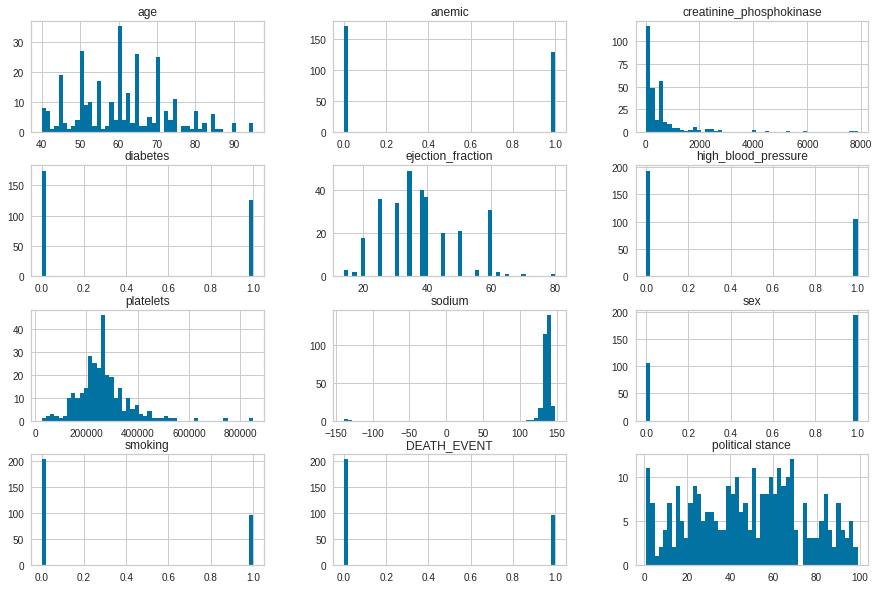

In [384]:
#histograms
df_1.hist(bins=50, figsize=(15,10))
plt.show()

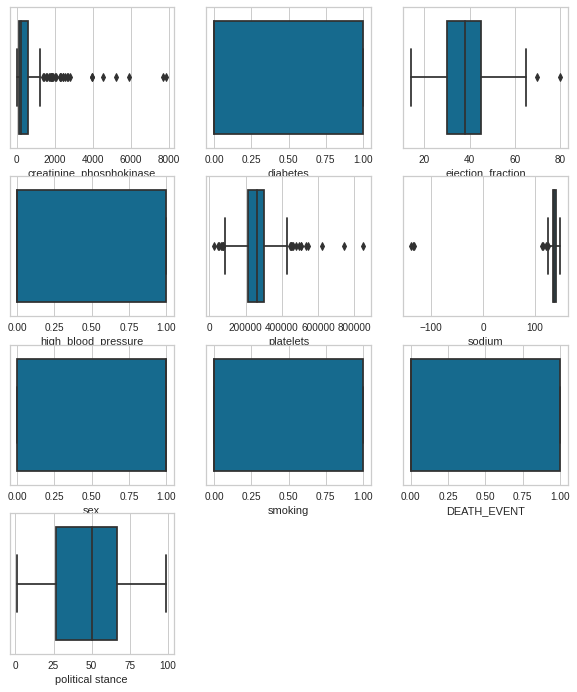

In [385]:
#define a figure to which we will add boxplots of each attribute.
plt.figure(figsize=(10,15))

#use an index to identify the spot of the subplot
j=1
columns=df_1.columns.tolist()
for k in columns[2:] :   #for each column in the dataframe
    plt.subplot(5,3,j) 
    sns.boxplot(x=k,data=df_1)
    j=j+1 #add 1 to go to the next subplot space

#show results
plt.show()

We note from the above that sodium has negative values, so we convert them to the absolute value.

In [386]:
#get the absolute values of the new data frame to get rid of the negative values
df_1=df_1.abs().copy()
df_1.head()

,age,anemic,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,sodium,sex,smoking,DEATH_EVENT,political stance
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,130.0,1.0,0.0,1.0,66.0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,136.0,1.0,0.0,1.0,91.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,129.0,1.0,1.0,1.0,56.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,137.0,1.0,0.0,1.0,58.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,116.0,0.0,0.0,1.0,58.0


### Imputation

In order to get rid of our NaNs and missing values we will impute. We will use several different types of imputers and see how well they work. Since running so many models against every change will be cumbersome for readers to follow, we will endeavor to alleviate this burden by noting that the below charts show that with only seven missing values, any of these methods are effectively equivalent.  Here we check imputations with Bayes, KNN, DecisionTreeRegressor, and ExtraTreesRegressor.

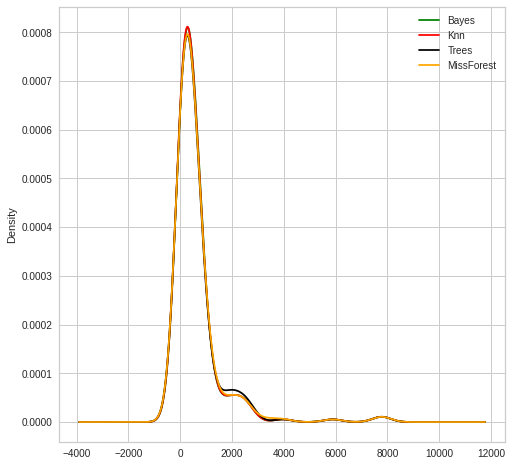

In [387]:
TARGET = df_1['DEATH_EVENT']
variables = df_1.columns.values
X_train, X_test, y_train, y_test = train_test_split(df_1.drop('DEATH_EVENT', axis=1), df_1['DEATH_EVENT'], test_size=0.3, random_state=0)

imputer_bayes = IterativeImputer(estimator=BayesianRidge(),max_iter=10,random_state=0)
imputer_knn = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), max_iter=10, random_state=0)
imputer_nonLin = IterativeImputer(estimator=DecisionTreeRegressor(max_features='sqrt', random_state=0), max_iter=10, random_state=0)
imputer_missForest = IterativeImputer( estimator=ExtraTreesRegressor(n_estimators=10, random_state=0), max_iter=10, random_state=0)

imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

X_train_bayes = imputer_bayes.transform(X_train)
X_train_knn = imputer_knn.transform(X_train)
X_train_nonLin = imputer_nonLin.transform(X_train)
X_train_missForest = imputer_missForest.transform(X_train)

predictors = [var for var in variables if var !='DEATH_EVENT']
X_train_bayes = pd.DataFrame(X_train_bayes, columns = predictors)
X_train_knn = pd.DataFrame(X_train_knn, columns = predictors)
X_train_nonLin = pd.DataFrame(X_train_nonLin, columns = predictors)
X_train_missForest = pd.DataFrame(X_train_missForest, columns = predictors)

fig = plt.figure()
ax = fig.add_subplot(111)

X_train_bayes['creatinine_phosphokinase'].plot(kind='kde', ax=ax, color='green')
X_train_knn['creatinine_phosphokinase'].plot(kind='kde', ax=ax, color='red')
X_train_nonLin['creatinine_phosphokinase'].plot(kind='kde', ax=ax, color='black')
X_train_missForest['creatinine_phosphokinase'].plot(kind='kde', ax=ax, color='orange')

# add legends
lines, labels = ax.get_legend_handles_labels()
labels = ['Bayes', 'Knn', 'Trees', 'MissForest']
ax.legend(lines, labels, loc='best')
fig.set_size_inches(8,8)
plt.show()

In [388]:
#choose one of the options (the default iterative imputer which is bayesian ridge)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# impute missing values
imp = IterativeImputer()
imp.fit(df_1)
II_df = imp.transform(df_1)
II_df = pd.DataFrame(II_df, columns=df_1.columns)
df_1 = II_df
df_1["DEATH_EVENT"] = TARGET
df_1.head()

,age,anemic,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,sodium,sex,smoking,DEATH_EVENT,political stance
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,130.0,1.0,0.0,1.0,66.0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,136.0,1.0,0.0,1.0,91.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,129.0,1.0,1.0,1.0,56.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,137.0,1.0,0.0,1.0,58.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,116.0,0.0,0.0,1.0,58.0


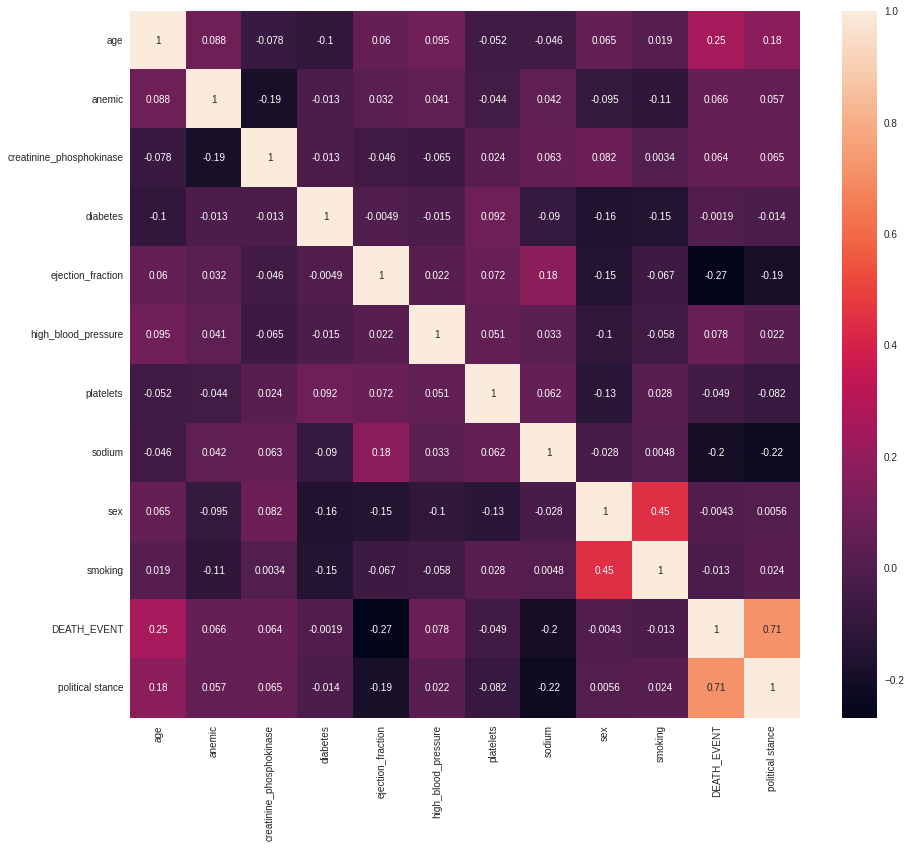

In [389]:
#create a correlation chart
corr = df_1.corr()
fig, ax = plt.subplots(figsize = (15, 13))
sns.heatmap(corr, annot=True)

Normalizing data

In order to compare apples apples, we normalize the data that is not boolean.

In [390]:
data_subset = df_1[['age','anemic','creatinine_phosphokinase','ejection_fraction','high_blood_pressure','platelets','sodium','political stance']]
data_subset = (data_subset-data_subset.mean())/data_subset.std()
df_1[['age','anemic','creatinine_phosphokinase','ejection_fraction','high_blood_pressure','platelets','sodium','political stance']] = data_subset[['age','anemic','creatinine_phosphokinase','ejection_fraction','high_blood_pressure','platelets','sodium','political stance']]
df_1.head()

,age,anemic,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,sodium,sex,smoking,DEATH_EVENT,political stance
0,1.190949,-0.869647,-0.007718,0.0,-1.527998,1.355651,1.678834e-02,-1.501519,1.0,0.0,1.0,0.678435
1,-0.490457,-0.869647,7.508397,0.0,-0.007065,-0.737700,7.523047e-09,-0.141739,1.0,0.0,1.0,1.638364
2,0.350246,-0.869647,-0.457921,0.0,-1.527998,-0.737700,-1.036336e+00,-1.728149,1.0,1.0,1.0,0.294464
3,-0.910808,1.146046,-0.494061,0.0,-1.527998,-0.737700,-5.455595e-01,0.084892,1.0,0.0,1.0,0.371258
4,0.350246,1.146046,-0.443465,1.0,-1.527998,-0.737700,6.507077e-01,-4.674340,0.0,0.0,1.0,0.371258


In [391]:
#designate dependent and independent variables

y = df_1['DEATH_EVENT']
y = y.to_numpy()
X = df_1.drop(["DEATH_EVENT"],axis = 1).to_numpy()
y = y.reshape(-1, 1)

In [392]:
#create a regression function
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

def regressionFunc(X,Y):
  X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
  
  #set up the regression
  lm = LinearRegression()
  lm.fit(X_train, y_train)

  #let's now see how it performs on test data
  y_pred = lm.predict(x_test)

  #find the r-sqaure by testing on the training data
  r2 = r2_score(y_test,y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = math.sqrt(mean_squared_error(y_test,y_pred)) 
  print("R-square:\t", r2)
  print("MAE:\t", mae)
  print("RMSE:\t", rmse)

regressionFunc(X,y)

R-square:	 0.5271318680050356
MAE:	 0.2682183148360654
RMSE:	 0.32416324145404285


A second regression model using statsmodel.  Here we just check we are on target, even without the train_test_split we did above.

In [393]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
from scipy.stats import t
from math import sqrt


def _OLS(X,y):
  #we will use statsmodel, which requires an extra column of 1's, which we add
  X = sm.add_constant(X)
  
  #use the OLS model to print results
  results = sm.OLS(y, X).fit()
  print(results.summary())

_OLS(X,y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     32.46
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           3.19e-44
Time:                        04:18:26   Log-Likelihood:                -75.674
No. Observations:                 299   AIC:                             175.3
Df Residuals:                     287   BIC:                             219.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3381      0.038      8.997      0.0

### Interpretation

* R-squared: It represents the “percentage variation in dependent that is explained by independent variables”. The drawback to the R-squared is that it increases as the number of predictors(dependent variables) increase. Therefore, it becomes inconclusive in case when it is to be decided whether additional variable is adding to the predictability power of the regression.

* Prob(F-Statistic): This tells the overall significance of the regression. This is to assess the significance level of all the variables together unlike the t-statistic that measures it for individual variables. The null hypothesis under this is “all the regression coefficients are equal to zero”. Prob(F-statistics) depicts the probability of null hypothesis being true. As per the above results, probability is not close to zero. This implies that overall the regressions is not meaningful.

* AIC/BIC: It stands for Akaike’s Information Criteria and is used for model selection. It penalizes the errors mode in case a new variable is added to the regression equation. It is calculated as number of parameters minus the likelihood of the overall model. A lower AIC implies a better model. Whereas, BIC stands for Bayesian information criteria and is a variant of AIC where penalties are made more severe.  We can see that the BIC is quite high, whereas it should preferably be lower.

* Prob(Omnibus): One of the assumptions of OLS is that the errors are normally distributed. Omnibus test is performed in order to check this. Here, the null hypothesis is that the errors are normally distributed. Prob(Omnibus) is supposed to be close to the 1 in order for it to satisfy the OLS assumption. In our model we see that this is not the case. As such something is wrong with our model.

* A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis. A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.  Here we have relatively large p-values, so we fail to reject the null hypothesis.  Thus we assume normality of the data.

Gradient Boost Regressor

In [394]:
import xgboost as xg
  
xgboost_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 42)
xgboost_r.fit(train_X, train_y)
pred = xgboost_r.predict(test_X)
  
# RMSE Computation
rmse = np.sqrt(mean_squared_error(test_y, pred))
print("RMSE: ",rmse)
print("MAE", mean_absolute_error(test_y, pred))
print("R_2: ", r2_score(test_y, pred))

RMSE:  0.3171036208425794
MAE 0.2730424765083525
R_2:  0.5846541961004884


Decision Tree Regressor

In [395]:
rt = DecisionTreeRegressor(criterion = 'mse', max_depth=5)
model_r = rt.fit(train_X, train_y)
pred = model_r.predict(test_X)

In [396]:
rmse = np.sqrt(mean_squared_error(test_y, pred))
print("RMSE: ",rmse)
print("MAE", mean_absolute_error(test_y, pred))
print("R_2: ", r2_score(test_y, pred))

RMSE:  0.3406119959129416
MAE 0.1469640852974186
R_2:  0.5207884205740123


SVM 

In [397]:
from sklearn.svm import SVC

y = df_1['DEATH_EVENT']
y = y.to_numpy()
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)

linear_svm = SVC(kernel='linear')
linear_svm.fit(train_X, train_y)
pred = linear_svm.predict(test_X)

rmse = np.sqrt(mean_squared_error(test_y, pred))
print("RMSE: ",rmse)
print("MAE", mean_absolute_error(test_y, pred))
print("R_2: ", r2_score(test_y, pred))

RMSE:  0.39440531887330776
MAE 0.15555555555555556
R_2:  0.35747067822539524


### Model Choice

I have found that the XGBoost is the best model, giving the highest r^2, a reasonable RMSE, and a comparable MAE.  As such, I choose that model.

## Yes/No Prediction

1. Locate, input and clean suitable data. Find a second data set that is suitable for a yes/no (logistic) prediction, impute the data and perform any clean up.

2. Construct at least 3 different logistic models using Python
 * Binary Logistic Regression
 * Multinomial Logistic Regression
 * Ordinal Logistic Regression

3. Analyze model performance metrics (AUC, ROC, Confusion Matrix) and select the best logistic model and explain why you selected the model you did

Note that Business Segment can be either Landscaping and Area Beautification, which is a 0, or Maintenance and Repair, which is a 1.  We will use this column for the Binary Logistic Regression.

The Political Affiliation column will be used for the nominal data, on the spectrum of 1 - conservative, 2 - extremely conservative, 3 - libertarian, 4 - no affiliation, 5 - other.

And the Survey Happiness column is data that is ordinal based on how the transaction went.

In [411]:
df_2 = pd.read_csv('https://raw.githubusercontent.com/MatthewFried/Udemy/master/Data/SAMPLE_1.csv')
df_2.head()

,Region,Market,Branch_Number,Customer_Number,Customer_Name,City,State,Product_Number,Product_Description,Business_Segment,Service_Date,Invoice_Number,Invoice_Date,Sales_Amount,Contracted Hours,Sales_Period,Sales_Rep,Political Affiliation,Survey Happiness
0,WEST,CALIFORNIA,803717,962713,GALACK Corp.,PETALUMA,CA,87000,Landscaping/Grounds Care,0,39286,27985,39289,197.95,2,P08,5060,2,5
1,WEST,CALIFORNIA,803717,962704,PUUALA Corp.,PETALUMA,CA,87000,Landscaping/Grounds Care,0,39286,27986,39289,197.95,2,P08,5060,1,3
2,WEST,CALIFORNIA,803717,962864,RACHS Corp.,PETALUMA,CA,70700,Predictive Maintenance/Preventative Maintenance,1,39286,28066,39289,191.28,3,P08,5060,4,4
3,NORTH,CANADA,940581,964910,VALLUE Corp.,ST ALBAN,PQ,87000,Landscaping/Grounds Care,0,39388,143519,39389,240.07,4,P11,44651,3,1
4,NORTH,CANADA,940581,2928848,CMVLC Corp.,QUEBEC,PQ,70700,Predictive Maintenance/Preventative Maintenance,1,39303,154865,39304,147.22,2,P08,160410,1,3


In [412]:
df_2.nunique()

Region                     4
Market                    14
Branch_Number             39
Customer_Number          173
Customer_Name            162
City                     139
State                     27
Product_Number             6
Product_Description        6
Business_Segment           2
Service_Date             116
Invoice_Number           201
Invoice_Date             110
Sales_Amount              84
Contracted Hours           5
Sales_Period              13
Sales_Rep                112
Political Affiliation      5
Survey Happiness           5
dtype: int64

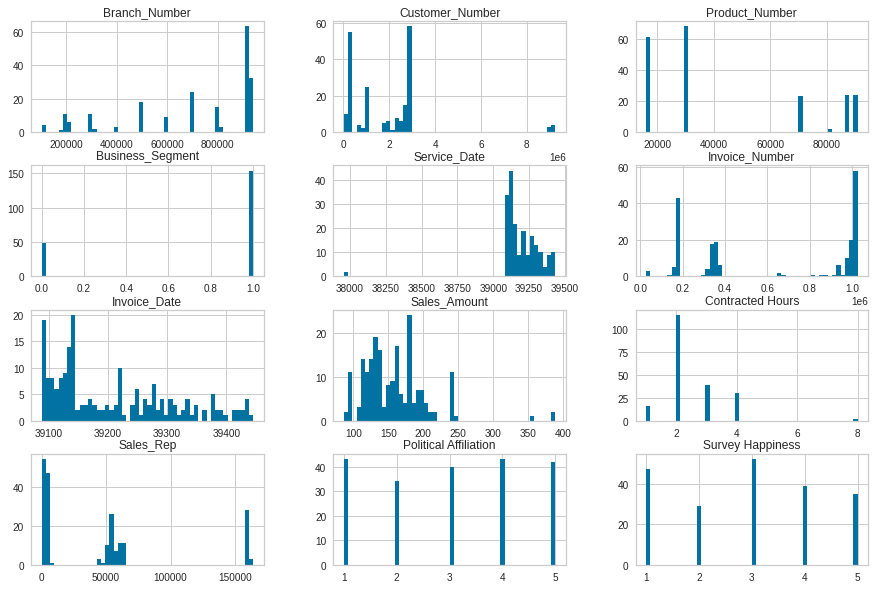

In [413]:
#histograms
df_2.hist(bins=50, figsize=(15,10))
plt.show()

It seems that our data does not have nulls, anomolies, or major outliers (unlike the previous data set), as such, there is nothing to impute and we will continue with our analysis.

In [414]:
# display column names, datatype, and non-null values 
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 202 non-null    object 
 1   Market                 202 non-null    object 
 2   Branch_Number          202 non-null    int64  
 3   Customer_Number        202 non-null    int64  
 4   Customer_Name          202 non-null    object 
 5   City                   202 non-null    object 
 6   State                  202 non-null    object 
 7   Product_Number         202 non-null    int64  
 8   Product_Description    202 non-null    object 
 9   Business_Segment       202 non-null    int64  
 10  Service_Date           202 non-null    int64  
 11  Invoice_Number         202 non-null    int64  
 12  Invoice_Date           202 non-null    int64  
 13  Sales_Amount           202 non-null    float64
 14  Contracted Hours       202 non-null    int64  
 15  Sales_

In [415]:
#do lable encoding

from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
df_2['Region']= label_encoder.fit_transform(df_2['Region'])
df_2['Market']= label_encoder.fit_transform(df_2['Market'])
df_2['Customer_Name']= label_encoder.fit_transform(df_2['Customer_Name'])
df_2['City']= label_encoder.fit_transform(df_2['City'])
df_2['State']= label_encoder.fit_transform(df_2['State'])
df_2['Product_Description']= label_encoder.fit_transform(df_2['Product_Description'])
df_2['Contracted Hours']= label_encoder.fit_transform(df_2['Contracted Hours'])
df_2['Sales_Period']= label_encoder.fit_transform(df_2['Sales_Period'])

Binary Logistic Regression

Accuracy:  1.0


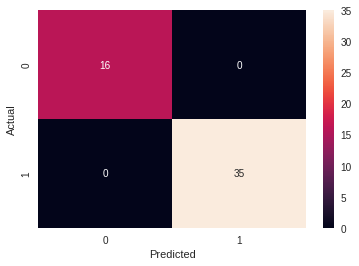

In [428]:
y = df_2['Business_Segment'].to_numpy()
X = df_2.drop(['Business_Segment'],axis = 1).to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ', accuracy_score(y_test, y_pred))
plt.show()

I'm not sure what is wrong with the data that I am getting such an output, but my guess is that the sample could be too small at 200 datapoints.

In [429]:
#import the function from sklearn
from sklearn.metrics import classification_report

#apply the function to the dataset and check results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        35

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



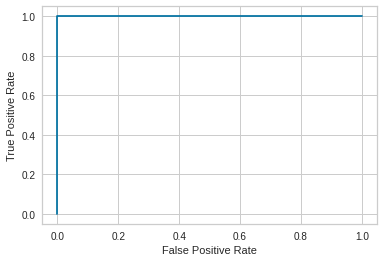

In [434]:
y_pred_proba = y_pred
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

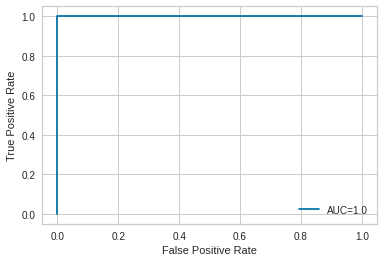

In [436]:
auc = roc_auc_score(y_test, y_pred_proba)

#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Multinomial Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Accuracy:  0.2549019607843137


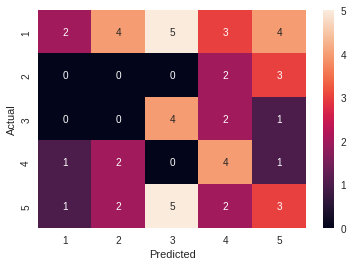

In [437]:
y = df_2['Political Affiliation'].to_numpy()
X = df_2.drop(['Political Affiliation'],axis = 1).to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logistic_regression= LogisticRegression(solver='newton-cg', multi_class='multinomial')
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ', accuracy_score(y_test, y_pred))
plt.show()

In [438]:
#import the function from sklearn
from sklearn.metrics import classification_report

#apply the function to the dataset and check results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.11      0.18        18
           2       0.00      0.00      0.00         5
           3       0.29      0.57      0.38         7
           4       0.31      0.50      0.38         8
           5       0.25      0.23      0.24        13

    accuracy                           0.25        51
   macro avg       0.27      0.28      0.24        51
weighted avg       0.33      0.25      0.24        51



It seems that there is no straightforward or even meaningful way to calculate multiclass formats for AUC and ROC (possibly due to the number of dimensions involved) in Python.  As such, I will skip this for this and the next model.

Ordinal Logistic Regression

In [443]:
!pip install mord

  Created wheel for mord: filename=mord-0.6-py3-none-any.whl size=6006 sha256=3b49bd1000123e5f90062650dec6ad3fb26b2eab0600f6d48924e9c60c03f230
  Stored in directory: /root/.cache/pip/wheels/80/1d/8a/bef1a01b6a3c91494905d161d5426c181819f9730a773141eb
Successfully built mord


Accuracy:  0.21568627450980393


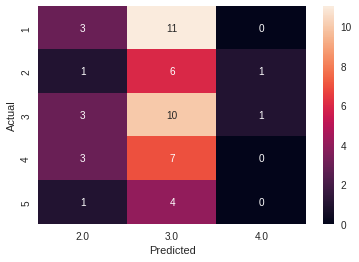

In [444]:
y = df_2['Survey Happiness'].to_numpy()
X = df_2.drop(['Survey Happiness'],axis = 1).to_numpy()

import mord

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
mul_lr = mord.OrdinalRidge(alpha=1.0,fit_intercept=True, normalize=False,copy_X=True, max_iter=None,tol=0.001, solver='auto').fit(X_train, y_train)

y_pred = mul_lr.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ', accuracy_score(y_test, y_pred))
plt.show()

Since the three models aren't really comparable, because a logistic model used on binary data is not the same as on ordinal or nominal data, there isn't a reasonable comparison here. As such, each model is what it is.

## Clustering

1. Use your Part A or Part B dataset

2. Create a cluster model. You do not need to employ multiple algorithms here. Just explain what approach you used.

3. Explain the clusters and what you can learn from them.

Here we implement k-means and do all the necessary work to see if we can isolate the proper k value to optimize our data.

The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest (as per this [book](https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb): 
1. First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations. 
2. Repeat until convergence (i.e., until the centroids stop moving)
3. Assign each instance to the closest centroid.
4. Update the centroids to be the mean of the instances that are assigned to them.

Here we use the basis of the code from [MLPR](https://github.com/mattharrison/ml_pocket_reference/blob/master/ch18.ipynb).  

Metrics we will be analyzing include: 
1. Inertia: It tells how far away the points within a cluster are. Therefore, a small amount of inertia is aimed for. The range of inertia’s value starts from zero and go up.
2. Silhouette score: This tells how far away the datapoints in one cluster are, from the datapoints in another cluster. The range of silhouette score is from -1 to 1. Score should be closer to 1 than -1.

Text(0, 0.5, 'Inertia')

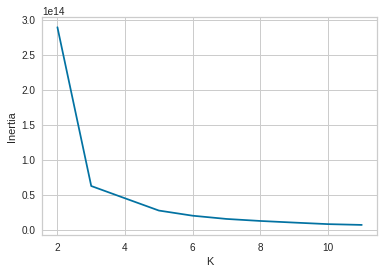

In [445]:
from sklearn.cluster import KMeans
km = KMeans(2, random_state=42)
km.fit(X)
X_km = km.predict(X)
inertias = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X)
    inertias.append(k2.inertia_)
fig, ax = plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f749e4d5950>,
      dtype=object)

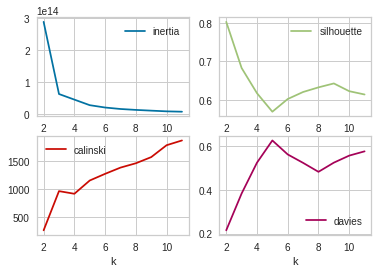

In [446]:
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
inertias = []
sils = []
chs = []
dbs = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X)
    inertias.append(k2.inertia_)
    sils.append(
        metrics.silhouette_score(X, k2.labels_)
    )
    chs.append(
        metrics.calinski_harabasz_score(
            X, k2.labels_
        )
    )
    dbs.append(
        metrics.davies_bouldin_score(
            X, k2.labels_
        )
    )
fig, ax = plt.subplots(figsize=(6, 4))
(
    pd.DataFrame(
        {
            "inertia": inertias,
            "silhouette": sils,
            "calinski": chs,
            "davies": dbs,
            "k": sizes,
        }
    )
    .set_index("k")
    .plot(ax=ax, subplots=True, layout=(2, 2))
)

We see from our analysis that the inertia "elbow" should be around 3.

The Davies-Bouldin score evaluates intra-cluster similarity and inter-cluster differences.  It is a validation metric that is  used in order to evaluate the optimal number of clusters. It is defined as a ratio between the cluster scatter and the cluster’s separation.  A lower value means that the clustering is better.  Here the lowest value is at 2.  The Calinksi method is  highest at 10 - which, all seems to indicate that although k of 2 is the a good solution, the data out to be exlpored further.